In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\perez(RNA) bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_perez(RNA).csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.4,-15.4,-13.7,-13.7,-14.2,-15.6,-16.9,-11.1,-14.4,-13.7,...,-16.9,-15.6,-14.2,-14.0,-16.9,-14.4,-13.7,-14.0,-14.2,1
1,-16.0,-13.7,-15.4,-13.7,-14.4,-16.9,-14.4,-15.4,-14.4,-14.2,...,-14.4,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-15.4,-13.7,1
2,-14.0,-13.7,-13.7,-14.2,-14.4,-13.8,-14.0,-14.2,-14.0,-13.7,...,-14.4,-13.8,-13.7,-16.0,-15.4,-16.0,-13.7,-15.4,-14.4,1
3,-13.7,-13.7,-13.8,-15.6,-16.9,-15.6,-16.9,-14.4,-13.7,-13.7,...,-13.7,-16.0,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-14.4,1
4,-14.2,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-16.0,-13.7,-15.4,...,-14.4,-13.7,-15.4,-16.0,-13.7,-14.0,-16.9,-15.6,-16.9,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-14.0,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-14.4,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-15.6,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.0,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-14.0,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-14.4,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-15.6,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.0,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.0,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4
14665,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-15.4,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8
14666,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-13.7,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4
14667,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-16.0,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.0,-13.8,-16.0,-15.4,-14.2,-14.4,-15.4,-13.7,-13.7,-16.0,...,-16.9,-11.1,-15.6,-11.1,-11.1,-14.2,-13.7,-14.0,-13.8,0
1,-11.1,-14.2,-14.0,-14.2,-13.7,-14.0,-11.1,-14.2,-13.7,-13.8,...,-16.9,-11.1,-15.6,-16.9,-14.4,-15.4,-16.0,-13.8,-15.6,0
2,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,-13.8,-14.4,-13.7,-13.8,...,-13.7,-13.8,-14.4,-14.0,-16.9,-14.0,-13.7,-14.4,-14.2,0
3,-13.8,-14.4,-14.2,-13.7,-15.4,-13.7,-13.7,-14.4,-13.8,-13.7,...,-16.9,-14.0,-14.4,-16.9,-14.0,-13.7,-13.7,-16.0,-13.7,0
4,-13.7,-13.7,-14.0,-14.2,-13.8,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.2,-14.0,-14.4,-14.2,-15.4,-14.4,-14.2,-15.4,-16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4,0
14665,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8,0
14666,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4,0
14667,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-14.106340
1,-79,-14.098998
2,-78,-14.116450
3,-77,-14.110805
4,-76,-14.116518
...,...,...
94,14,-14.079003
95,15,-14.092713
96,16,-14.099611
97,17,-14.063958


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-14.092467,150
1,-79,-14.107778,151
2,-78,-14.095460,152
3,-77,-14.101847,153
4,-76,-14.121801,154
...,...,...,...
94,14,-14.122721,244
95,15,-14.112053,245
96,16,-14.112550,246
97,17,-14.142695,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


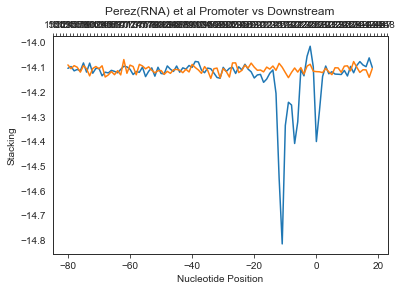

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Perez(RNA) et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.4,-15.4,-13.7,-13.7,-14.2,-15.6,-16.9,-11.1,-14.4,-13.7,...,-16.9,-15.6,-14.2,-14.0,-16.9,-14.4,-13.7,-14.0,-14.2,1
1,-16.0,-13.7,-15.4,-13.7,-14.4,-16.9,-14.4,-15.4,-14.4,-14.2,...,-14.4,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-15.4,-13.7,1
2,-14.0,-13.7,-13.7,-14.2,-14.4,-13.8,-14.0,-14.2,-14.0,-13.7,...,-14.4,-13.8,-13.7,-16.0,-15.4,-16.0,-13.7,-15.4,-14.4,1
3,-13.7,-13.7,-13.8,-15.6,-16.9,-15.6,-16.9,-14.4,-13.7,-13.7,...,-13.7,-16.0,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-14.4,1
4,-14.2,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-16.0,-13.7,-15.4,...,-14.4,-13.7,-15.4,-16.0,-13.7,-14.0,-16.9,-15.6,-16.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-15.4,-13.7,-14.4,-16.9,-14.0,-14.4,-11.1,-13.8,-13.7,-14.4,...,-14.2,-14.0,-13.8,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4,0
29334,-14.2,-13.7,-14.0,-13.8,-14.2,-14.4,-13.8,-11.1,-14.4,-14.0,...,-13.7,-16.0,-13.8,-14.0,-14.2,-11.1,-14.0,-16.0,-13.8,0
29335,-13.7,-13.7,-13.7,-13.7,-14.4,-11.1,-16.9,-15.6,-13.8,-16.0,...,-16.0,-14.0,-14.2,-13.8,-14.4,-14.0,-13.8,-13.7,-14.4,0
29336,-15.6,-14.2,-13.7,-15.4,-14.4,-11.1,-14.2,-13.7,-14.0,-14.2,...,-15.4,-13.7,-13.7,-13.7,-13.7,-16.0,-13.8,-14.4,-13.8,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
X.shape

(29338, 99)

## Model Training

In [28]:
kfold = KFold(n_splits=10, shuffle=True)
clf = XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                    max_depth=None, min_child_weight=5, n_estimators=300, 
                    subsample=1.0, n_jobs=-1, random_state=101)
fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.8769597818677574, Precision: 0.9094890510948905, Recall: 0.8401888064733648, F1 Score: 0.873466526463372, MCC: 0.7563407951869848, Specificity: 0.9145416953824949
Fold 2: Accuracy: 0.8715064758009543, Precision: 0.8866052445074415, Recall: 0.8521798365122616, F1 Score: 0.8690517540812782, MCC: 0.7435811120078766, Specificity: 0.8908594815825375
Fold 3: Accuracy: 0.8738922972051807, Precision: 0.8853868194842407, Recall: 0.8547717842323651, F1 Score: 0.8698099929627023, MCC: 0.7480449515614407, Specificity: 0.8924731182795699
Fold 4: Accuracy: 0.8629856850715747, Precision: 0.8816067653276956, Recall: 0.8424242424242424, F1 Score: 0.8615702479338844, MCC: 0.7268166896136563, Specificity: 0.8840579710144928
Fold 5: Accuracy: 0.8711656441717791, Precision: 0.8952312138728323, Recall: 0.8417119565217391, F1 Score: 0.8676470588235293, MCC: 0.7437197428440736, Specificity: 0.9008207934336525
Fold 6: Accuracy: 0.8704839809134287, Precision: 0.8859455481972038, Recall: 0.84

In [29]:
accuracy_list

[0.8769597818677574,
 0.8715064758009543,
 0.8738922972051807,
 0.8629856850715747,
 0.8711656441717791,
 0.8704839809134287,
 0.8752556237218814,
 0.8670756646216768,
 0.8670303443573133,
 0.8765768837367883]

In [30]:
precision_list

[0.9094890510948905,
 0.8866052445074415,
 0.8853868194842407,
 0.8816067653276956,
 0.8952312138728323,
 0.8859455481972038,
 0.9005763688760807,
 0.881104033970276,
 0.891566265060241,
 0.8950437317784257]

In [31]:
recall_list

[0.8401888064733648,
 0.8521798365122616,
 0.8547717842323651,
 0.8424242424242424,
 0.8417119565217391,
 0.8425472358292512,
 0.8457374830852503,
 0.8486707566462167,
 0.8414715719063545,
 0.8492392807745505]

In [32]:
specificity_list

[0.9145416953824949,
 0.8908594815825375,
 0.8924731182795699,
 0.8840579710144928,
 0.9008207934336525,
 0.8970099667774086,
 0.9052197802197802,
 0.885480572597137,
 0.8936022253129347,
 0.9031607262945528]

In [33]:
f1_score_list 

[0.873466526463372,
 0.8690517540812782,
 0.8698099929627023,
 0.8615702479338844,
 0.8676470588235293,
 0.8637015781922525,
 0.8722958827634334,
 0.8645833333333334,
 0.8657949070887818,
 0.8715400993612491]

In [34]:
mcc_list

[0.7563407951869848,
 0.7435811120078766,
 0.7480449515614407,
 0.7268166896136563,
 0.7437197428440736,
 0.7413207014125123,
 0.7520273731745699,
 0.7346492090355804,
 0.7354618472410094,
 0.7538933534911624]

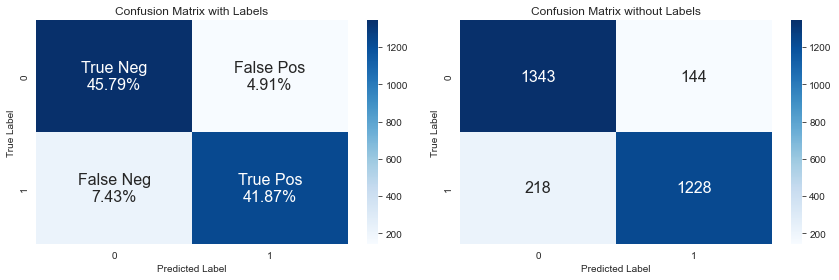

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [36]:
import pickle

# Save the trained model to a file in pickle format
model_filename = 'APR_model.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print("Model saved successfully.")


Model saved successfully.


In [37]:
print(mean(accuracy_list))

0.8712932381468335


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


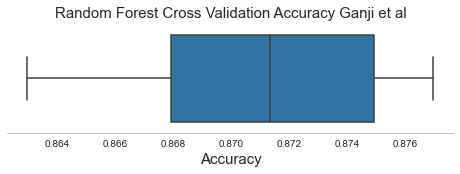

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [39]:
clf.feature_importances_

array([0.00565184, 0.00564398, 0.00578632, 0.00594954, 0.00588987,
       0.0059121 , 0.00615428, 0.00594826, 0.0055977 , 0.00547608,
       0.00612961, 0.0057286 , 0.00575916, 0.00576339, 0.00572372,
       0.0053885 , 0.00564652, 0.00614418, 0.00583594, 0.00572598,
       0.0058161 , 0.00560984, 0.00552069, 0.00579451, 0.0056578 ,
       0.00604505, 0.00550118, 0.00594264, 0.00564173, 0.00602243,
       0.00580472, 0.00558013, 0.00580844, 0.00608203, 0.00572736,
       0.00526305, 0.00533398, 0.00567742, 0.00588162, 0.00631792,
       0.00695557, 0.00596794, 0.005937  , 0.00571534, 0.00536501,
       0.00819612, 0.00755771, 0.00757631, 0.00639088, 0.00637579,
       0.00631318, 0.00690587, 0.00638342, 0.00635259, 0.00632697,
       0.00689352, 0.00740728, 0.00590426, 0.00761167, 0.00711463,
       0.00664019, 0.00663555, 0.00605734, 0.00651102, 0.00701704,
       0.00750193, 0.00830561, 0.01681116, 0.06540301, 0.13323483,
       0.03400381, 0.0116921 , 0.0247786 , 0.03662267, 0.02110

In [40]:
clf.feature_importances_.shape

(99,)

In [41]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

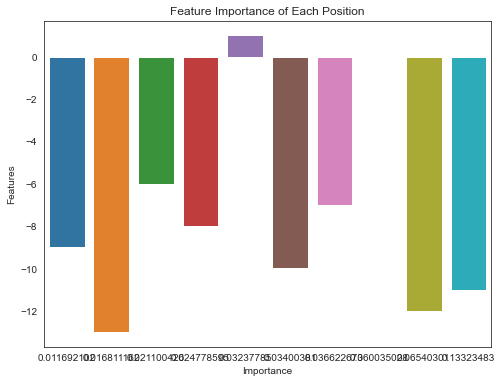

In [42]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [43]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.005652,-80
1,1,0.005644,-79
2,2,0.005786,-78
3,3,0.005950,-77
4,4,0.005890,-76
...,...,...,...
94,94,0.005441,14
95,95,0.005714,15
96,96,0.005812,16
97,97,0.006366,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

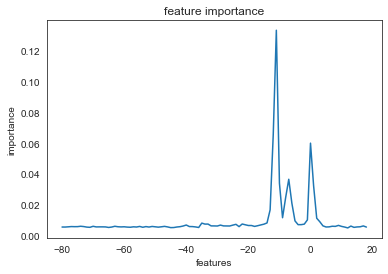

In [44]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [45]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8765768837367883
Precision: 0.8950437317784257
Recall: 0.8492392807745505
f1_score: 0.8715400993612491


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


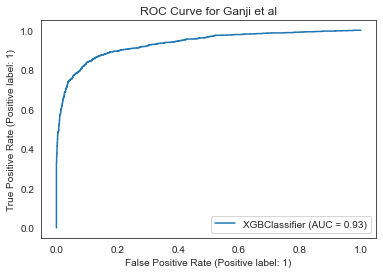

In [45]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


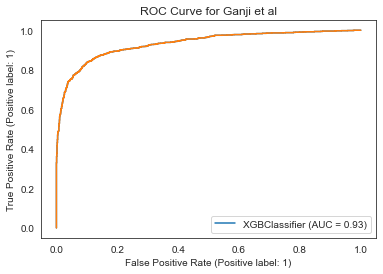

In [46]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

#roc_df.to_csv('d:/ROC Curve data/downstream_perez_RNA_xg_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [46]:
!pip install shap

In [47]:
import shap


In [48]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [49]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[7727, 8694, 4837, 6285, 3809, 2843, 7418, 4292, 9540, 5284, 1806, 9563, 2412, 3844, 1824, 7482, 9307, 8937, 3690, 7241, 705, 3930, 5391, 779, 476, 8500, 6618, 9405, 742, 4820, 6755, 8855, 8195, 8265, 569, 2627, 257, 9104, 4328, 6287]


In [50]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [51]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-14.4,-15.4,-14.2,-11.1,-11.1,-15.6,-16.9,-14.0,-14.2,-14.0,...,-14.0,-11.1,-14.2,-14.0,-14.2,-15.4,-13.7,-14.2,-14.0,-14.2
6345,-13.8,-13.7,-14.2,-15.6,-16.9,-14.4,-13.8,-11.1,-11.1,-15.6,...,-13.7,-13.7,-13.7,-13.7,-15.4,-14.4,-14.2,-13.8,-11.1,-15.6
8807,-15.4,-13.7,-13.7,-13.7,-14.2,-11.1,-11.1,-11.1,-14.4,-14.0,...,-11.1,-14.4,-13.7,-13.7,-13.7,-13.7,-13.7,-15.4,-13.7,-14.2
5017,-11.1,-15.6,-13.8,-14.2,-14.0,-13.7,-16.0,-13.7,-13.7,-13.7,...,-16.9,-11.1,-14.4,-13.8,-14.4,-15.4,-16.0,-15.4,-13.7,-13.7
2395,-16.0,-13.7,-13.8,-14.4,-13.7,-14.0,-11.1,-13.8,-16.0,-14.0,...,-14.2,-15.4,-13.7,-14.2,-14.4,-13.8,-14.0,-14.4,-11.1,-13.8
4771,-15.4,-16.0,-15.4,-13.7,-14.2,-14.4,-15.4,-14.4,-13.8,-14.2,...,-14.4,-13.8,-14.0,-14.4,-14.2,-13.7,-15.4,-14.2,-14.0,-13.7
6378,-11.1,-13.8,-16.0,-13.8,-15.6,-16.9,-14.4,-15.4,-14.4,-16.9,...,-14.0,-16.0,-14.0,-11.1,-11.1,-13.8,-14.2,-14.4,-13.7,-13.7
6038,-11.1,-11.1,-16.9,-15.6,-16.9,-11.1,-15.6,-14.2,-13.7,-14.0,...,-16.9,-14.0,-14.4,-16.9,-14.4,-13.7,-14.0,-11.1,-16.9,-14.4
2073,-11.1,-15.6,-14.2,-14.0,-16.9,-15.6,-14.2,-14.0,-13.8,-13.7,...,-11.1,-11.1,-14.0,-14.2,-11.1,-15.6,-16.9,-15.6,-11.1,-13.8
8765,-13.8,-14.4,-13.8,-14.4,-13.8,-14.4,-13.7,-15.4,-14.4,-14.2,...,-13.7,-16.0,-13.7,-15.4,-13.7,-13.7,-13.7,-13.7,-13.7,-16.0


# X promoters

In [52]:
X_promoters= promoter.drop(columns=['label']) #X.loc[:14668]
X_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-14.4,-15.4,-13.7,-13.7,-14.2,-15.6,-16.9,-11.1,-14.4,-13.7,...,-14.0,-16.9,-15.6,-14.2,-14.0,-16.9,-14.4,-13.7,-14.0,-14.2
1,-16.0,-13.7,-15.4,-13.7,-14.4,-16.9,-14.4,-15.4,-14.4,-14.2,...,-13.8,-14.4,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-15.4,-13.7
2,-14.0,-13.7,-13.7,-14.2,-14.4,-13.8,-14.0,-14.2,-14.0,-13.7,...,-13.7,-14.4,-13.8,-13.7,-16.0,-15.4,-16.0,-13.7,-15.4,-14.4
3,-13.7,-13.7,-13.8,-15.6,-16.9,-15.6,-16.9,-14.4,-13.7,-13.7,...,-14.0,-13.7,-16.0,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-14.4
4,-14.2,-13.8,-14.0,-13.7,-16.0,-13.7,-15.4,-16.0,-13.7,-15.4,...,-13.8,-14.4,-13.7,-15.4,-16.0,-13.7,-14.0,-16.9,-15.6,-16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-13.8,-14.0,-14.4,-16.9,-14.4,-13.8,-15.6,-11.1,-16.9,-14.0,...,-14.4,-14.2,-13.8,-14.0,-14.4,-14.2,-15.4,-16.0,-15.4,-13.7
14665,-14.2,-14.4,-15.4,-13.7,-14.2,-14.4,-15.4,-13.7,-13.7,-14.2,...,-14.0,-14.2,-11.1,-14.0,-13.7,-14.4,-16.9,-11.1,-11.1,-14.4
14666,-14.4,-11.1,-14.2,-13.7,-13.7,-13.7,-13.7,-13.7,-14.0,-13.8,...,-11.1,-13.8,-14.4,-14.2,-13.7,-14.0,-11.1,-11.1,-13.8,-14.2
14667,-13.7,-14.2,-14.4,-13.8,-14.0,-13.7,-14.4,-16.9,-14.0,-14.4,...,-13.7,-14.0,-11.1,-13.8,-16.0,-14.0,-11.1,-13.8,-14.4,-14.2


In [53]:
explainer = shap.TreeExplainer(clf, X_promoters)
shap_values = explainer.shap_values(X_promoters)

100%|===================| 14618/14669 [05:06<00:01]        

In [54]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

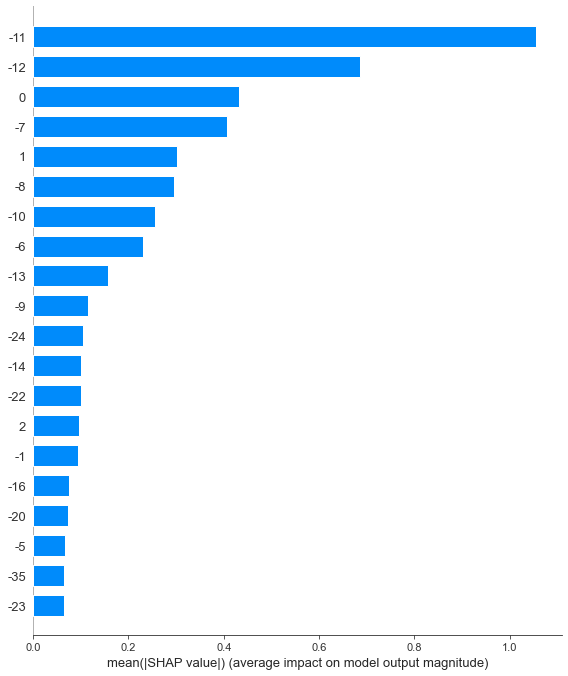

In [55]:
shap.summary_plot(shap_values,X_promoters, plot_type="bar", feature_names = X_promoters.columns)

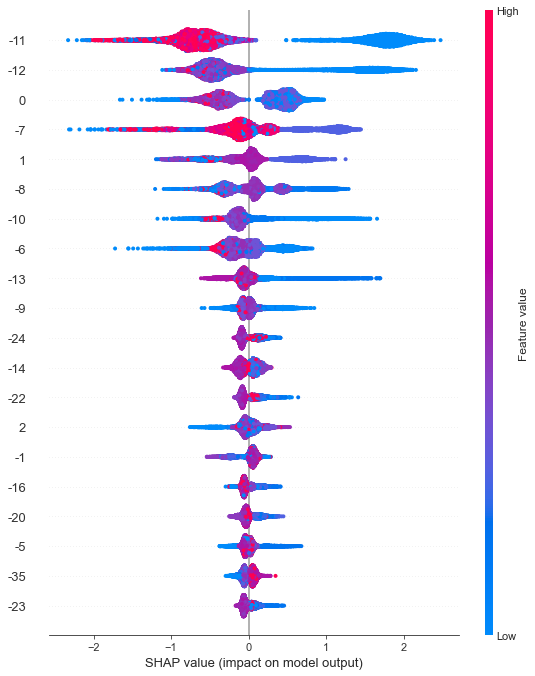

In [56]:
shap.summary_plot(shap_values, X_promoters, feature_names = X_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

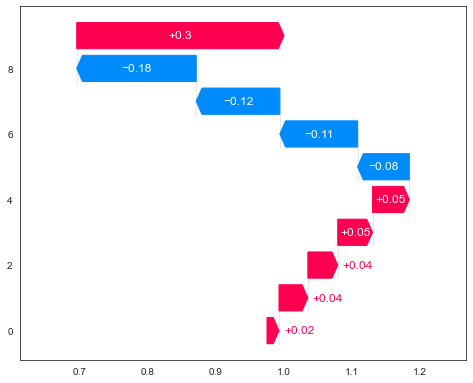

In [55]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [47]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\perez(RNA)\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\perez(RNA)\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\perez(RNA)\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\perez(RNA)\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [48]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Perez(RNA) Test Organism')]

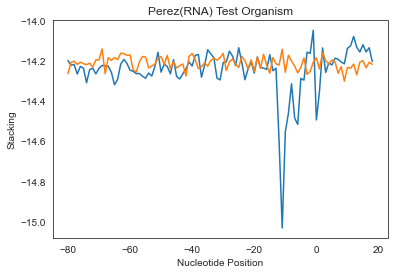

In [49]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Perez(RNA) Test Organism')

## Test Labels

In [50]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [51]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [52]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9138528138528138


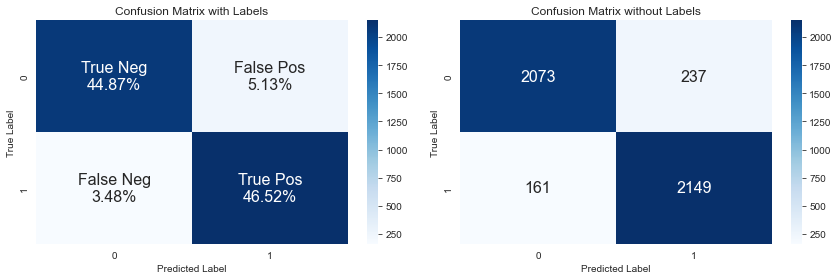

In [53]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [55]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.9199134199134199, Precision: 0.9110169491525424, Recall: 0.9307359307359307, F1 Score: 0.9207708779443254, MCC: 0.8400236413423727, Specificity: 0.9090909090909091
Fold 2/10
 Accuracy: 0.8939393939393939, Precision: 0.8611111111111112, Recall: 0.9393939393939394, F1 Score: 0.8985507246376813, MCC: 0.79115480528524, Specificity: 0.8484848484848485
Fold 3/10
 Accuracy: 0.8939393939393939, Precision: 0.90625, Recall: 0.8787878787878788, F1 Score: 0.8923076923076922, MCC: 0.7882407813680822, Specificity: 0.9090909090909091
Fold 4/10
 Accuracy: 0.9134199134199135, Precision: 0.8866396761133604, Recall: 0.948051948051948, F1 Score: 0.9163179916317992, MCC: 0.8288303786839134, Specificity: 0.8787878787878788
Fold 5/10
 Accuracy: 0.9242424242424242, Precision: 0.9117647058823529, Recall: 0.9393939393939394, F1 Score: 0.9253731343283583, MCC: 0.8488746876271654, Specificity: 0.9090909090909091
Fold 6/10
 Accuracy: 0.9069264069264069, Precision: 0.9051724137931034, Recall:

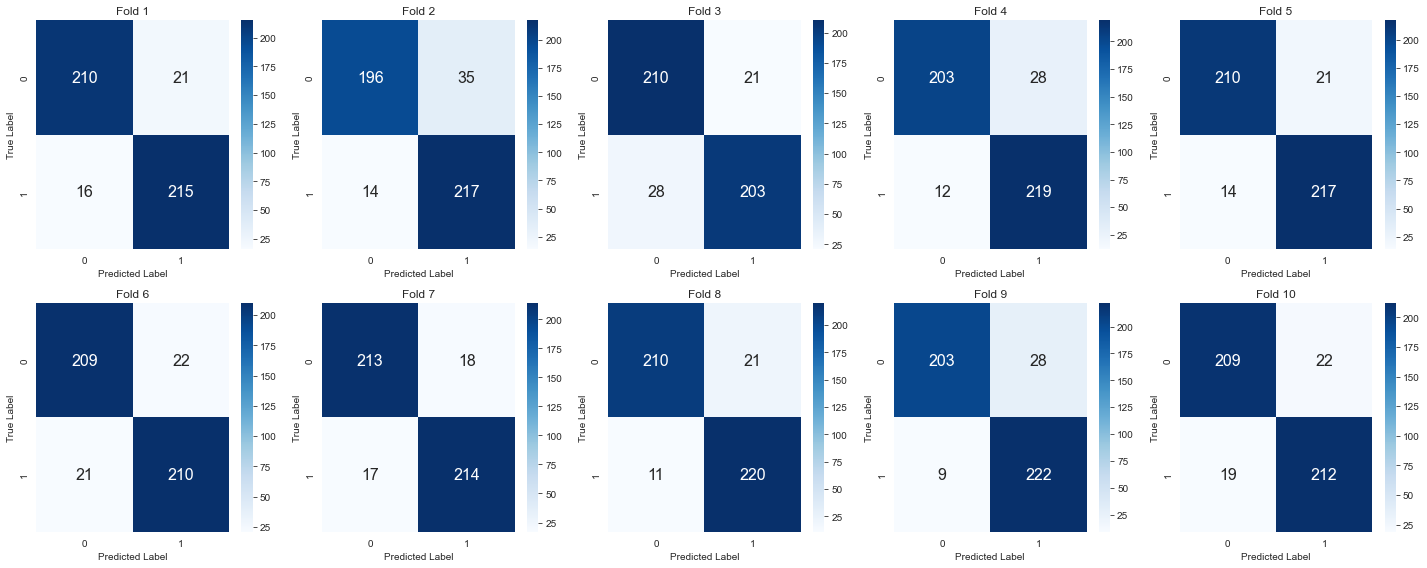

In [56]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [57]:
test_accuracy

[0.9199134199134199,
 0.8939393939393939,
 0.8939393939393939,
 0.9134199134199135,
 0.9242424242424242,
 0.9069264069264069,
 0.9242424242424242,
 0.9307359307359307,
 0.9199134199134199,
 0.9112554112554112]

In [58]:
test_precision

[0.9110169491525424,
 0.8611111111111112,
 0.90625,
 0.8866396761133604,
 0.9117647058823529,
 0.9051724137931034,
 0.9224137931034483,
 0.9128630705394191,
 0.888,
 0.905982905982906]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [59]:
test_recall

[0.9307359307359307,
 0.9393939393939394,
 0.8787878787878788,
 0.948051948051948,
 0.9393939393939394,
 0.9090909090909091,
 0.9264069264069265,
 0.9523809523809523,
 0.961038961038961,
 0.9177489177489178]

In [60]:
test_specificity

[0.9090909090909091,
 0.8484848484848485,
 0.9090909090909091,
 0.8787878787878788,
 0.9090909090909091,
 0.9047619047619048,
 0.922077922077922,
 0.9090909090909091,
 0.8787878787878788,
 0.9047619047619048]

In [61]:
test_f1_score

[0.9207708779443254,
 0.8985507246376813,
 0.8923076923076922,
 0.9163179916317992,
 0.9253731343283583,
 0.9071274298056156,
 0.9244060475161987,
 0.9322033898305083,
 0.923076923076923,
 0.9118279569892475]

In [62]:
test_mcc

[0.8400236413423727,
 0.79115480528524,
 0.7882407813680822,
 0.8288303786839134,
 0.8488746876271654,
 0.8138604398741863,
 0.8484927990177686,
 0.8622802089280486,
 0.8426821509603546,
 0.8225801946547077]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [63]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense perez_RNA promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-16.0,-14.0,-11.1,-14.2,-15.4,-13.7,-14.2,-14.0,-13.7,-13.7,...,-11.1,-14.4,-13.7,-13.7,-13.7,-14.0,-14.2,-13.7,-14.0,1
1,-14.2,-13.7,-14.0,-16.9,-15.6,-14.2,-15.4,-16.0,-13.7,-14.0,...,-13.7,-14.0,-16.9,-14.4,-15.4,-14.2,-11.1,-14.4,-13.7,1
2,-13.7,-14.2,-14.4,-15.4,-14.4,-14.2,-15.4,-16.0,-15.4,-16.0,...,-14.0,-16.9,-14.0,-14.2,-15.6,-13.8,-16.0,-13.7,-13.7,1
3,-14.2,-14.0,-16.0,-14.0,-14.2,-13.7,-14.0,-16.9,-14.0,-14.4,...,-14.4,-11.1,-14.2,-14.0,-14.2,-13.7,-13.7,-15.4,-14.4,1
4,-14.0,-11.1,-13.8,-16.0,-13.7,-13.7,-15.4,-16.0,-13.8,-11.1,...,-14.4,-14.0,-11.1,-16.9,-11.1,-11.1,-14.0,-14.2,-14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-15.6,-13.8,-13.7,-13.7,-14.2,-11.1,-11.1,-11.1,-14.0,-13.7,...,-13.7,-14.2,-14.4,-15.4,-14.2,-15.6,-13.8,-14.2,-11.1,0
12164,-13.7,-14.2,-14.0,-13.7,-14.2,-15.6,-11.1,-13.8,-14.4,-16.9,...,-13.8,-11.1,-15.6,-11.1,-14.2,-14.0,-16.9,-15.6,-14.2,0
12165,-14.0,-14.4,-14.2,-15.4,-14.4,-11.1,-11.1,-11.1,-14.2,-14.0,...,-13.8,-14.0,-16.0,-13.7,-13.8,-14.4,-14.0,-16.9,-11.1,0
12166,-13.7,-14.0,-14.2,-15.4,-13.7,-14.4,-16.9,-15.6,-11.1,-11.1,...,-11.1,-11.1,-14.2,-13.8,-14.0,-13.7,-13.7,-16.0,-14.0,0


In [64]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [65]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8118323746918652, Precision: 0.8220338983050848, Recall: 0.7963875205254516, F1 Score: 0.8090075062552127, MCC: 0.6239783860343372, Specificity: 0.9047619047619048
Fold 2/10
 Accuracy: 0.8274445357436319, Precision: 0.8192, Recall: 0.8407224958949097, F1 Score: 0.8298217179902755, MCC: 0.655107896470866, Specificity: 0.8273026315789473
Fold 3/10
 Accuracy: 0.8266228430566968, Precision: 0.8294701986754967, Recall: 0.8226600985221675, F1 Score: 0.8260511129431163, MCC: 0.6532698469954173, Specificity: 0.8141447368421053
Fold 4/10
 Accuracy: 0.8167625308134757, Precision: 0.8083067092651757, Recall: 0.8308702791461412, F1 Score: 0.8194331983805668, MCC: 0.633763789597134, Specificity: 0.8305921052631579
Fold 5/10
 Accuracy: 0.8225143796220213, Precision: 0.8202614379084967, Recall: 0.8256578947368421, F1 Score: 0.822950819672131, MCC: 0.645044373589144, Specificity: 0.8026315789473685
Fold 6/10
 Accuracy: 0.8233360723089564, Precision: 0.802773497688752, Recall: 0.

In [66]:
antisense_accuracy

[0.8118323746918652,
 0.8274445357436319,
 0.8266228430566968,
 0.8167625308134757,
 0.8225143796220213,
 0.8233360723089564,
 0.8241577649958916,
 0.8315529991783073,
 0.8116776315789473,
 0.8256578947368421]

In [67]:
antisense_precision

[0.8220338983050848,
 0.8192,
 0.8294701986754967,
 0.8083067092651757,
 0.8202614379084967,
 0.802773497688752,
 0.8208469055374593,
 0.8244766505636071,
 0.8091353996737357,
 0.8344594594594594]

In [68]:
antisense_recall

[0.7963875205254516,
 0.8407224958949097,
 0.8226600985221675,
 0.8308702791461412,
 0.8256578947368421,
 0.8569078947368421,
 0.8289473684210527,
 0.8421052631578947,
 0.8157894736842105,
 0.8125]

In [69]:
antisense_specificity

[0.9047619047619048,
 0.8273026315789473,
 0.8141447368421053,
 0.8305921052631579,
 0.8026315789473685,
 0.819376026272578,
 0.7898193760262726,
 0.819376026272578,
 0.8210180623973727,
 0.8075657894736842]

In [70]:
antisense_f1_score

[0.8090075062552127,
 0.8298217179902755,
 0.8260511129431163,
 0.8194331983805668,
 0.822950819672131,
 0.8289578361177405,
 0.8248772504091655,
 0.8331977217249796,
 0.8124488124488124,
 0.8233333333333333]

In [71]:
antisense_mcc

[0.6239783860343372,
 0.655107896470866,
 0.6532698469954173,
 0.633763789597134,
 0.645044373589144,
 0.6481642806857346,
 0.6483496603629276,
 0.6632630605850993,
 0.6233763426680242,
 0.6515414315346623]

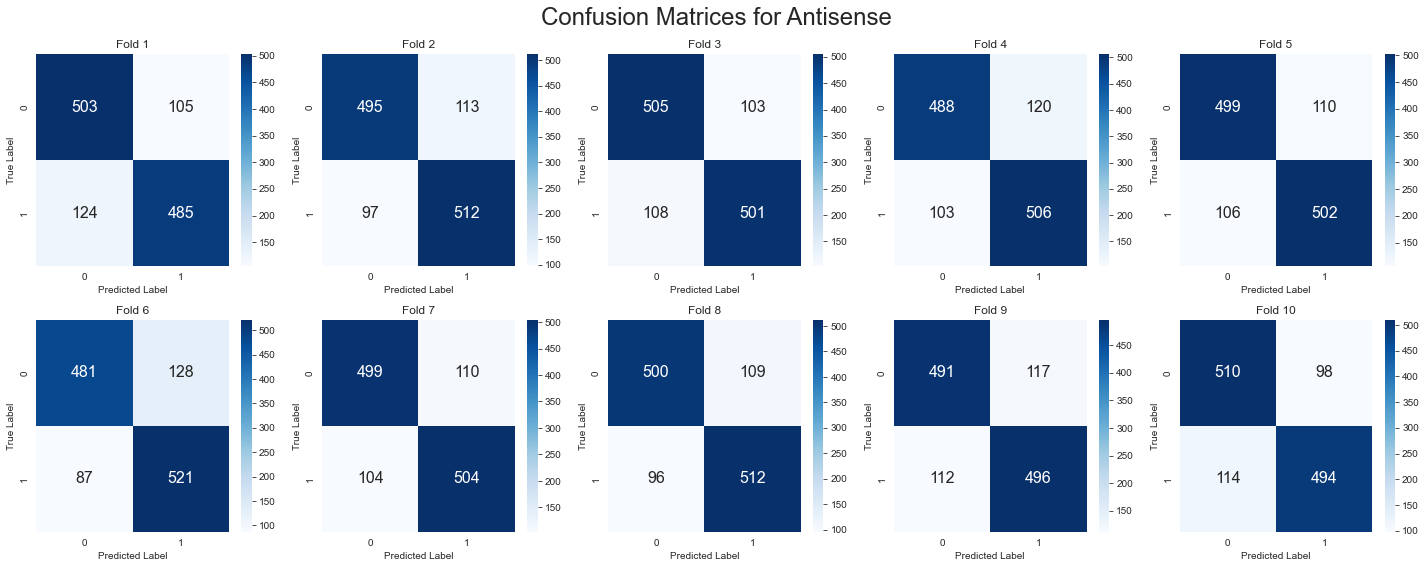

In [72]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

In [73]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced perez_RNA promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-14.0,-14.2,-15.6,-13.8,-16.0,-13.8,-15.6,-11.1,-11.1,-14.2,...,-13.7,-14.0,-14.2,-13.7,-13.7,-13.7,-15.4,-14.2,-14.4,1
1,-15.4,-14.2,-14.4,-13.7,-13.7,-15.4,-13.7,-13.7,-16.0,-13.8,...,-14.4,-14.0,-16.9,-14.0,-13.7,-16.0,-15.4,-14.4,-16.9,1
2,-11.1,-11.1,-16.9,-11.1,-14.4,-15.4,-14.4,-16.9,-14.4,-14.0,...,-14.0,-16.9,-14.4,-13.7,-15.4,-13.7,-14.4,-16.9,-14.0,1
3,-13.8,-14.4,-13.7,-13.8,-14.0,-14.4,-14.2,-15.4,-13.7,-16.0,...,-13.7,-13.7,-13.8,-15.6,-14.2,-13.7,-13.7,-15.4,-14.2,1
4,-14.0,-14.2,-14.0,-13.7,-13.7,-16.0,-13.7,-13.7,-15.4,-14.2,...,-13.8,-14.4,-13.7,-14.0,-14.2,-13.7,-13.7,-13.7,-15.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-11.1,-16.9,-11.1,-11.1,-14.4,-13.8,-15.6,-11.1,-16.9,-15.6,...,-14.4,-13.7,-13.8,-14.0,-14.2,-11.1,-11.1,-15.6,-11.1,0
12126,-11.1,-15.6,-14.2,-13.8,-15.6,-16.9,-14.4,-13.7,-14.0,-16.9,...,-11.1,-16.9,-15.6,-14.2,-13.7,-13.8,-11.1,-15.6,-16.9,0
12127,-13.7,-14.0,-14.2,-13.7,-14.0,-14.2,-13.8,-11.1,-15.6,-14.2,...,-14.4,-13.8,-15.6,-16.9,-11.1,-14.4,-13.8,-11.1,-14.4,0
12128,-16.9,-11.1,-15.6,-14.2,-13.7,-14.0,-14.2,-13.8,-11.1,-14.4,...,-16.9,-15.6,-11.1,-14.2,-15.4,-14.2,-15.6,-11.1,-16.9,0


In [74]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [75]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8178070898598516, Precision: 0.8362369337979094, Recall: 0.7907742998352554, F1 Score: 0.812870448772227, MCC: 0.6365731814559178, Specificity: 0.8388157894736842
Fold 2/10
 Accuracy: 0.8070898598516076, Precision: 0.8243478260869566, Recall: 0.7808896210873146, F1 Score: 0.802030456852792, MCC: 0.6150528546770951, Specificity: 0.8448844884488449
Fold 3/10
 Accuracy: 0.8227535037098104, Precision: 0.843859649122807, Recall: 0.7924217462932455, F1 Score: 0.8173322005097706, MCC: 0.6467290635313464, Specificity: 0.8333333333333334
Fold 4/10
 Accuracy: 0.8186314921681781, Precision: 0.8341968911917098, Recall: 0.7957166392092258, F1 Score: 0.8145025295109611, MCC: 0.6379567087686603, Specificity: 0.8531353135313532
Fold 5/10
 Accuracy: 0.809563066776587, Precision: 0.8230240549828178, Recall: 0.7891268533772653, F1 Score: 0.8057190916736754, MCC: 0.6196654419596753, Specificity: 0.8415841584158416
Fold 6/10
 Accuracy: 0.8318219291014015, Precision: 0.836120401337792

In [76]:
internal_accuracy

[0.8178070898598516,
 0.8070898598516076,
 0.8227535037098104,
 0.8186314921681781,
 0.809563066776587,
 0.8318219291014015,
 0.8244023083264633,
 0.8087386644682605,
 0.8293487221764221,
 0.8573784006595219]

In [77]:
internal_precision

[0.8362369337979094,
 0.8243478260869566,
 0.843859649122807,
 0.8341968911917098,
 0.8230240549828178,
 0.8361204013377926,
 0.8370497427101201,
 0.8235294117647058,
 0.8433734939759037,
 0.8739205526770294]

In [78]:
internal_recall

[0.7907742998352554,
 0.7808896210873146,
 0.7924217462932455,
 0.7957166392092258,
 0.7891268533772653,
 0.8250825082508251,
 0.8052805280528053,
 0.7854785478547854,
 0.8085808580858086,
 0.834983498349835]

In [79]:
internal_specificity

[0.8388157894736842,
 0.8448844884488449,
 0.8333333333333334,
 0.8531353135313532,
 0.8415841584158416,
 0.83003300330033,
 0.8385502471169687,
 0.8434925864909391,
 0.8319604612850082,
 0.8500823723228995]

In [80]:
internal_f1_score

[0.812870448772227,
 0.802030456852792,
 0.8173322005097706,
 0.8145025295109611,
 0.8057190916736754,
 0.8305647840531561,
 0.8208578637510514,
 0.8040540540540541,
 0.8256107834877845,
 0.8540084388185654]

In [81]:
internal_mcc

[0.6365731814559178,
 0.6150528546770951,
 0.6467290635313464,
 0.6379567087686603,
 0.6196654419596753,
 0.6636977133850496,
 0.6492604519400874,
 0.6181216283877058,
 0.659245952525224,
 0.715455497948674]

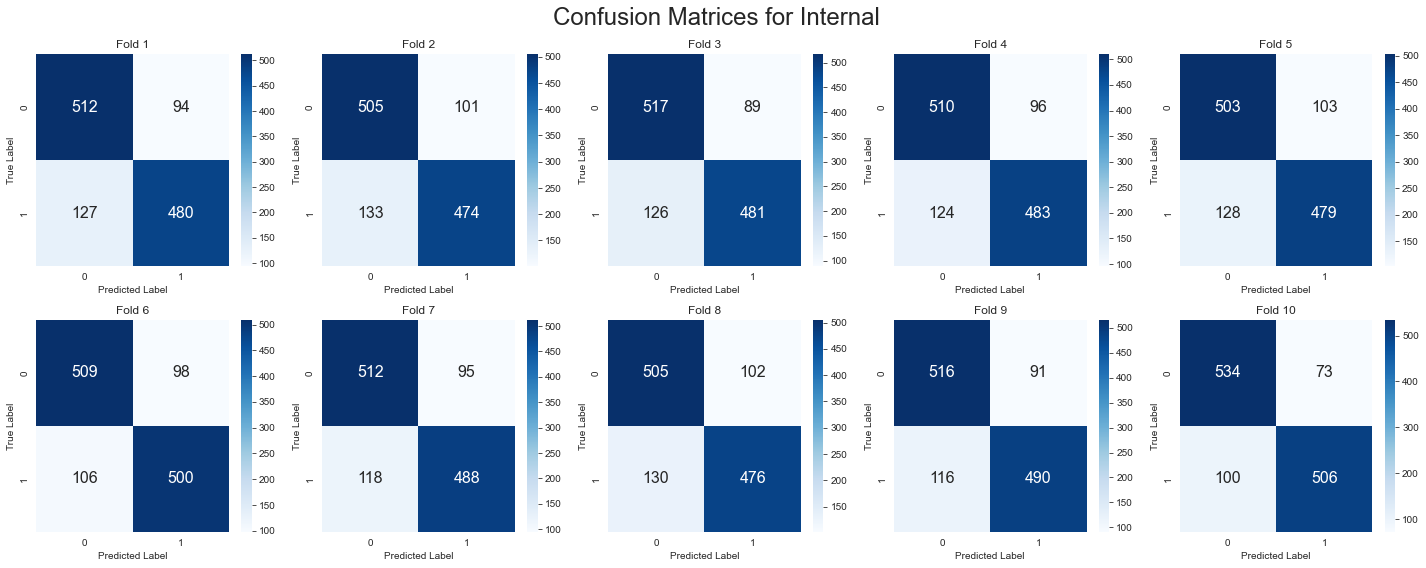

In [82]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
